In [6]:
# Done -- linear regression, logistic regression
# Now -- decision tree, SVM
# then jaccard index, cosine similarity, weighted kernel density estimator
#
# regularlize all models -- later. I have a lot of data.
# train, cross validate  -- later. I need some predictive power.
#
# start with tech, then for all entries in my database 
# what predictors did greenberg use?
#
# duration Length of project in Days Double
# twitter_url Connected to twitter Boolean
# has_video Video present Boolean
# facebook_connected Connected to Facebook Boolean
# facebook_friends Number of facebook friends Integer
# twitter_followers Number of twitter followers Integer
# sent Sentiment (pos, neg, or neutral) String --
#      For the sentiment attribute, we used the Mashape Text-Processing API
# fkgl Grade level Double -FKGL stands for Flesch-Kincaid Grade Level (measures reading ability) 
#       from nltk
#sent_count Number of sentences in project description Integer
# see Tindle blog post


In [7]:
# Features I already have _______________________________________
# - rewards: n, min, max, intn shipping
# - n creator backed
# - title char len
# - blurb char len
# - launch time (in Unix time)
# - project duration
# - goal

# I could add easily 
# - day of the month
# - month
# - time between launch and ship of rewards
# - title word len
# - blurb word len

In [8]:
# After modeling, 
# Other possible features to extract _____________________________
# - n pictures -- use beautiful soup
# - has video
# - project body length 
# - project n spelling errors
# - text quality, sentiment analysis
# - other reward parameters

# lower priority -- 
# - international projects


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from IPython.display import display
from IPython.core.pylabtools import getfigs
from sklearn import linear_model 
#import seaborn as sns

In [10]:
%matplotlib qt

In [11]:
#from extract_kickstarter_features import *
#%load_ext autoreload
#%autoreload 2

In [12]:
saveas_path = '/Users/jamie/insight data/figures/'

In [13]:
tech_df = pd.read_pickle('tech_df.save')

In [14]:
np.shape(tech_df)

(6633, 12)

In [15]:
# create new columns 
tech_df['pledged/goal'] = tech_df['pledged']/tech_df['goal']

In [16]:
tech_df.tail(3)

,id,pledged,goal,n rewards,min reward,max reward,intn ship,n creator backed,title n chars,blurb n chars,launch time,campaign dur,pledged/goal
6630,16468,8904,5000,7,1,100,1,0,56,129,1411686079,3459600,1.7808
6631,16469,615,50000,8,1,1000,0,0,51,103,1409441823,5184000,0.0123
6632,16470,585549,7500,11,1,1337,1,2,44,114,1413159586,2595600,78.0732


In [17]:
#let's find some data stories!

In [18]:
# restrict to projects with goals of less than $500,000
reasonable_goal_is = np.where(tech_df['goal'] < 500000)[0]
print np.shape(reasonable_goal_is)

(6546,)


In [19]:
# restrict to projects with goals of less than $50,000
small_goal_is = np.where(tech_df['goal'] < 25000)[0]
print np.shape(small_goal_is)

(3886,)


In [20]:
# now try a logistic regression ___________
tech_df.ix[:,'outcomes'] = 0
tech_df.ix[tech_df['pledged'] >= tech_df['goal'],'outcomes'] = 1

In [21]:
tech_df.tail(5)

,id,pledged,goal,n rewards,min reward,max reward,intn ship,n creator backed,title n chars,blurb n chars,launch time,campaign dur,pledged/goal,outcomes
6628,16461,25,100000,5,25,10000,-1,0,35,134,1414879251,2595600,0.00025,0
6629,16462,15790,3500,8,59,250,1,1,36,132,1411511254,2592000,4.511429,1
6630,16468,8904,5000,7,1,100,1,0,56,129,1411686079,3459600,1.7808,1
6631,16469,615,50000,8,1,1000,0,0,51,103,1409441823,5184000,0.0123,0
6632,16470,585549,7500,11,1,1337,1,2,44,114,1413159586,2595600,78.0732,1


In [22]:
# removed launch time. replace with time of day, day of week, month
predictor_cols = list(['goal','n rewards','min reward','max reward','intn ship','n creator backed','title n chars','blurb n chars','campaign dur'])
predictors = tech_df.ix[:,predictor_cols]

In [23]:
# I need to train and test this.
clf = linear_model.LogisticRegression()
clf.fit(predictors.ix[small_goal_is,:],tech_df.ix[small_goal_is,'outcomes'])
clf.coef_


array([[ -5.70416186e-05,   4.87435326e-06,  -4.88537285e-05,
          6.37065361e-05,   5.68284322e-07,   8.36966921e-06,
          5.41117328e-06,  -3.07871009e-06,  -1.21689714e-07]])

In [24]:
# next try an svm, random forests. I'll need to scale it. 
# http://scikit-learn.org/stable/modules/svm.html
# http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
#
# I think I need more predictors, nlp, and a distribution 
# latent variable analysis?

In [25]:
# now trying a decision tree since it's easy, worked for Greenberg and Parado.
# http://scikit-learn.org/stable/modules/tree.html

In [27]:
X = predictors.ix[small_goal_is,:]
n_points = np.shape(X)[0]
X_i = range(n_points)
y = tech_df.ix[small_goal_is,'pledged']

In [28]:
print n_points

3886


In [29]:
# for now use all of the data --
from sklearn.tree import DecisionTreeRegressor
clf_1 = DecisionTreeRegressor(max_depth=5)
clf_1.fit(X,y)
y_1 = clf_1.predict(X)

#clf_2 = DecisionTreeRegressor(max_depth=2)
#clf_2.fit(X,y)
#y_2 = clf_1.predict(X)

In [30]:
# Plot the results
plt.figure()
plt.scatter(X_i, y, c="k", label="data")

In [31]:
plt.plot(X_i, y_1, c="g", label="max_depth=5", color='g')
#plt.plot(X_i, y_2, c="r", label="max_depth=2", color='r')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
#plt.legend()

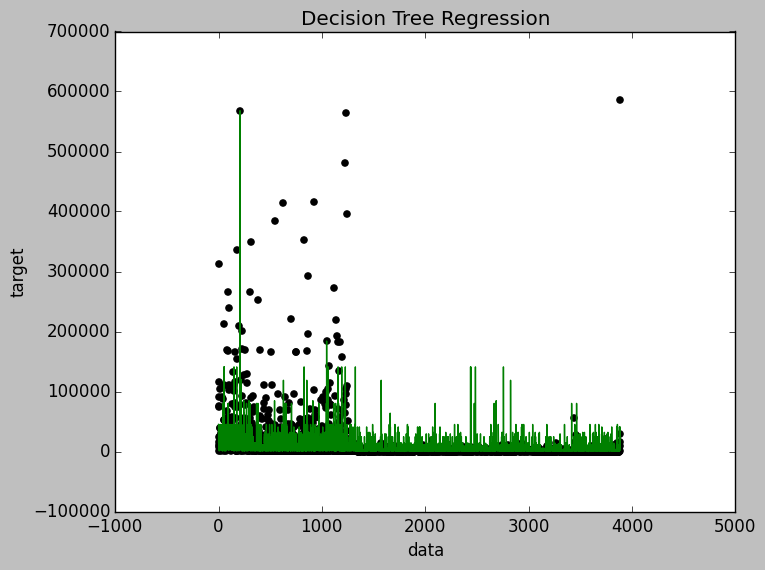

In [32]:
display(plt.gcf())
#plt.close('all')

In [33]:
# how do I interpret my decision tree? 
# what features are important? 
# how do I pick my levels -- while cross validating? 

In [34]:
# now determine how well this classifies. 
# what is the baseline? count
n_success = sum(tech_df['outcomes'])